Use the data set named Amsterdam.json. This data is about the prices of properties listed on AirBnB. You work for a content marketing company. Your company is doing a story on Amsterdam, one of the components of this report will be about the accessibility of affordable accommodation in the city and about, what factors influence, the prices. Your task is to assist in relevant data analysis. Keeping this context in mind, answer the questions that follow:

In [1]:
import pandas as pd
import numpy as np

In [2]:
airbnb_dataset = pd.read_json('amsterdam.json')
airbnb_dataset.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,$130.00,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,$110.00,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,$115.00,52.364179,4.864885,Entire home/apt,f


In [3]:
# No of rows in the raw file
no_of_records = airbnb_dataset.shape[0]
no_of_records

15181

In [4]:
# Is 'Bathroom' column present in the dataset
column_list = airbnb_dataset.columns.to_list()
query = "Bathroom"
if query in column_list:
    print('column {column} is present in the list'.format(column = query))
else:
    print('column {column} is not present in the list'.format(column = query))

column Bathroom is not present in the list


In [5]:
#Column named as “bedrooms” has 12 missing values?
missingValues = airbnb_dataset['bedrooms'].isna().sum()
print(' "bedroom" has {count} missing values'.format(count = missingValues))

 "bedroom" has 12 missing values


In [6]:
airbnb_dataset.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [7]:
import re
def removeFormatting(x):
    return float(re.sub("[^\d\.]", "", x))

In [8]:
#average value of price column
priceList = airbnb_dataset.price.apply(lambda pr: removeFormatting(pr)).to_list()
airbnb_dataset['price'] = priceList
airbnb_dataset.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,Entire home/apt,f


In [9]:
#calculate the average and max for price
price_avg = sum(priceList)/len(priceList)
price_avg_round = round(price_avg,3)
print("average price round to 3 decimal place is {price}".format(price = price_avg_round))
price_max = round(max(priceList),1)
print("Max price round to 1 decimal place is {price}".format(price = price_max))

average price round to 3 decimal place is 134.799
Max price round to 1 decimal place is 3142.0


In [10]:
#AWhat is the 99th percentile in the price column? (Rounded to 1 decimal place, use round
priceList_sorted = sorted(priceList)
percentile_value = round(priceList_sorted[int(len(priceList)*0.99)],1)
print('percentile value round to 1 decimal place is {value}'.format(value = percentile_value))


percentile value round to 1 decimal place is 440.0


In [11]:
pricelist_refined = [x for x in priceList_sorted if int(x) != 440]
pricelist_refined
#calculate the 90th percentile
percentile_value = round(priceList_sorted[int(len(priceList)*0.90)],1)
print('percentile value round to 1 decimal place is {value}'.format(value = percentile_value))


percentile value round to 1 decimal place is 220.0


In [12]:
airbnb_dataset.isnull().sum().count


<bound method Series.count of host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64>

In [13]:
airbnb_dataset.dropna(axis=0, inplace=True)

In [14]:
airbnb_dataset.isnull().sum().count

<bound method Series.count of host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
price                             0
latitude                          0
longitude                         0
room_type                         0
instant_bookable                  0
dtype: int64>

In [15]:
airbnb_dataset.shape[0]

15148

In [16]:
airbnb_dataset.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,Entire home/apt,f


In [17]:
def haversine_np(lon1, lat1):
    centrLat = 52.379189
    centrLon = 4.899431
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, centrLon, centrLat])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [18]:
airbnb_dataset['d_centre'] = haversine_np(airbnb_dataset['longitude'],airbnb_dataset['latitude'])
airbnb_dataset.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_centre
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f,2.885443
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,Entire home/apt,f,2.919191
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,Entire home/apt,f,3.168346
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,Entire home/apt,f,2.876726


In [19]:
airbnb_dataset.sort_values(by= 'd_centre',
    ascending=True,
    inplace=True,
    kind='quicksort')
airbnb_dataset.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_centre
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,Private room,f,0.115801
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,Shared room,f,0.140946
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,Entire home/apt,f,0.145468
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,Private room,t,0.199767
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,Private room,f,0.206638


In [20]:
# The average price of Private Rooms that are within 1 km from city centre is (Round to 1 decimal place)

airbnb_dataset_price_avg = airbnb_dataset[airbnb_dataset.d_centre < 1.0]
price_avg = sum(airbnb_dataset_price_avg.price)/airbnb_dataset_price_avg.shape[0]
price_avg_rd = round(price_avg,1)
price_avg_rd

173.7

In [21]:
airbnb_dataset_df = pd.get_dummies(airbnb_dataset)
airbnb_dataset_df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,d_centre,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,0.115801,0,1,0,1,0
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,0.140946,0,0,1,1,0
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,0.145468,1,0,0,1,0
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,0.199767,0,1,0,0,1
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,0.206638,0,1,0,1,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
airbnb_dataset_df[airbnb_dataset_df.columns] = pd.DataFrame(scaler.fit_transform(airbnb_dataset_df))

In [24]:
airbnb_dataset_df = airbnb_dataset_df.dropna()

In [25]:
#Create a predictor matrix X, after creating dummies for categorical data. How many columns X will have?
# since price is our target variable we need to drop it
predictor_Y = airbnb_dataset_df['price']
airbnb_dataset_df.drop('price', axis = 1, inplace=True)
airbnb_dataset_df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,d_centre,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
3158,0.009434,0.1875,0.1250,0.2,0.000000,0.003831,0.016129,0.000000,0.596904,0.448718,0.141565,1.0,0.0,0.0,1.0,0.0
3168,0.009434,0.1250,0.1250,0.1,0.000000,0.005747,0.022177,0.000000,0.681188,0.439209,0.141733,1.0,0.0,0.0,1.0,0.0
2639,0.028302,0.1875,0.1875,0.2,0.066667,0.001916,0.000000,0.022222,0.612756,0.451127,0.129239,1.0,0.0,0.0,1.0,0.0
3010,0.009434,0.0625,0.1250,0.1,0.000000,0.001916,0.060484,0.000000,0.606289,0.617263,0.138345,0.0,1.0,0.0,1.0,0.0
1860,0.009434,0.1875,0.1250,0.2,0.000000,0.001916,0.038306,0.000000,0.737255,0.502532,0.107296,1.0,0.0,0.0,1.0,0.0


In [26]:
len(airbnb_dataset_df.columns.to_list())

16

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(airbnb_dataset_df,predictor_Y,test_size = 0.3, random_state = 200)

In [29]:
y_test

5931     0.057957
4171     0.057957
2716     0.091579
7223     0.025616
1520     0.097983
           ...   
9043     0.075568
6665     0.021134
13730    0.025937
10383    0.037144
7461     0.041947
Name: price, Length: 4535, dtype: float64

In [30]:
X_test

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,d_centre,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
5931,0.009434,0.1875,0.1875,0.2,0.200000,0.003831,0.038306,0.0,0.540240,0.629382,0.202754,1.0,0.0,0.0,1.0,0.0
4171,0.009434,0.1875,0.1250,0.1,0.066667,0.001916,0.000000,0.0,0.695632,0.428487,0.163159,1.0,0.0,0.0,1.0,0.0
2716,0.009434,0.1875,0.1250,0.2,0.000000,0.003831,0.026210,0.0,0.748275,0.486913,0.131268,1.0,0.0,0.0,1.0,0.0
7223,0.009434,0.0625,0.1250,0.1,0.066667,0.005747,0.048387,0.0,0.632419,0.384470,0.226083,1.0,0.0,0.0,1.0,0.0
1520,0.009434,0.1875,0.1250,0.3,0.200000,0.007663,0.024194,0.0,0.620715,0.472091,0.094639,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,0.009434,0.1875,0.1250,0.2,0.066667,0.001916,0.060484,0.0,0.455358,0.570900,0.253169,1.0,0.0,0.0,1.0,0.0
6665,0.009434,0.0625,0.1250,0.1,0.000000,0.005747,0.006048,0.0,0.600335,0.396345,0.216416,1.0,0.0,0.0,1.0,0.0
13730,0.009434,0.1875,0.1250,0.2,0.200000,0.001916,0.266129,0.0,0.545999,0.290333,0.398224,1.0,0.0,0.0,0.0,1.0
10383,0.009434,0.0625,0.1250,0.1,0.000000,0.000000,0.000000,0.0,0.434004,0.511010,0.275398,1.0,0.0,0.0,1.0,0.0


In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
Regressor = RandomForestRegressor(n_estimators=100,random_state=200,max_features='sqrt')

In [33]:
Regressor.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', random_state=200)

In [34]:
Regressor.predict(X_test)

array([0.06142491, 0.0357765 , 0.04533141, ..., 0.04348063, 0.03241755,
       0.02722062])

In [35]:
Regressor.score(X_test,y_test)

0.42207780828595476

In [36]:
param_grid = {  'bootstrap': [True], 'max_features': ['sqrt'], 
              'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170,180, 190, 200,210, 220, 230,
                              240, 250,260,270, 280, 290,300,310,320,330, 340, 350, 360, 370, 380, 390,400, 420, 420, 430,
                              440, 450, 460, 470, 480,490, 500, 520, 520, 530, 540, 550, 560, 570,580,590,600]}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
Regressor = RandomForestRegressor(random_state=200,oob_score=True)
gsv = GridSearchCV(estimator= Regressor,param_grid=param_grid,return_train_score=True, verbose=True,n_jobs=-1)
gsv.fit(X_train,y_train)

Fitting 5 folds for each of 58 candidates, totalling 290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed: 20.8min finished


GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=200),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': ['sqrt'],
                         'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100, 110,
                                          120, 130, 140, 150, 160, 170, 180,
                                          190, 200, 210, 220, 230, 240, 250,
                                          260, 270, 280, 290, 300, 310, 320, ...]},
             return_train_score=True, verbose=True)

In [39]:
forest = gsv.best_estimator_

reg_prediction=forest.predict(X_test)

print (gsv.best_score_, gsv.best_params_)

0.49393486322571756 {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 590}


In [40]:
Regressor_opt = RandomForestRegressor(n_estimators=580,random_state=200,max_features='sqrt')
Regressor_opt.fit(X_test,y_test)

RandomForestRegressor(max_features='sqrt', n_estimators=580, random_state=200)

In [41]:
featureList = pd.Series(Regressor_opt.feature_importances_, index = airbnb_dataset_df.columns.to_list())

<AxesSubplot:>

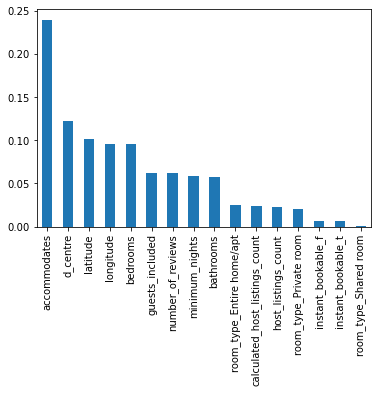

In [42]:
featureList.sort_values(ascending= False).plot(kind='bar')